In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.constants import N_A
from scipy import linalg
import math, cmath
from sympy import *


In [4]:
T_cell_radius = 5e-4 #cm
T_cell_surface_area = 4*math.pi*((T_cell_radius)**2)

(1e4*1e3*(1/N_A)*T_cell_surface_area*(3/(2*math.pi))*(1/1e4))**(1/3)
(3*1e4*1e3*tumour_cell_surface_area/(2*1e4*N_A*math.pi))**(1/3)

2.920429895719562e-06

In [15]:
Target_cell_number = 2e5
well_size = 150e-6
t_end = 60*60*10*10
t = np.geomspace(1e-10, t_end, 150)
tspan = [1e-10, t_end]
z0 = [0, 0]

In [16]:
def model_S_monospecific(t, z, Ainit, rtot, kon, k2, koff):
     k = Ainit*kon
     Atot = well_size*N_A*Ainit/Target_cell_number
     A0 = Atot - z[0] - z[1] 
     Ag = rtot - z[0] - 2*z[1]

     dA10 = 2*(k*Ag*A0/rtot) - koff*z[0] - (k2*Ag*z[0]/rtot) + 2*koff*z[1]
     dA11 = (k2*Ag*z[0]/rtot) - 2*koff*z[1]

     return [dA10, dA11]

def model_S_dimensionless(t, z, alpha1, alpha2, beta):

     A0 = beta - z[0] - z[1] 
     Ag = 1 - z[0] - 2*z[1]

     dA10 = 2*(alpha1*Ag*A0) - z[0] - (alpha2*Ag*z[0]) + 2*z[1]
     dA11 = (alpha2*Ag*z[0]) - 2*z[1]

     return [dA10, dA11]

def dxdt(x, y, alpha1, alpha2, beta):
     return 2*alpha1*(1-x-2*y)*(beta-x-y) -x - alpha2*x*(1-x-2*y) + 2*y

def dydt(x, y, alpha2):
     return  alpha2*x*(1-x-2*y) - 2*y

In [38]:
def A1_steady_state(x, Ainit, k1, koff, k2, rtot):
    Atot = well_size*N_A*Ainit/Target_cell_number
    express = ((-2*Atot*k1*Ainit*(rtot - x)*(koff*rtot + k2*x) + x*(((koff*rtot + k2*x)**2) +k1*Ainit*(rtot - x)*(2*koff*rtot + k2*(rtot+x))))/((koff*rtot + k2*x)**2))

    return express

def A2_steady_state(x, k2, koff, rtot):
    express = k2*x*(rtot-x)/(2*(koff*rtot + k2*x))

    return express

def A1_nullcline_plus(x, rtot, koff, k2):
    a = 1
    b = 2*x - rtot
    c = 2*(koff/k2)*rtot*x
    express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

def A1_nullcline_minus(x, rtot, koff, k2):
    a = 1
    b = 2*x - rtot
    c = 2*(koff/k2)*rtot*x
    express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

def A1_alternative_null_plus(x, Ainit, rtot, kon, koff, k2):
    Atot = well_size*N_A*Ainit/Target_cell_number
    a = ((2*kon*Ainit/rtot) + (k2/rtot))
    b = (2*kon*Ainit/rtot)*(3*x - Atot - rtot) - koff - k2 + (2*k2/rtot)*x
    c = (2*kon*Ainit/rtot)*(Atot*rtot - 2*Atot*x -x*rtot +2*(x**2)) + 2*koff*x
    express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

def A1_alternative_null_minus(x, Ainit, rtot, kon, koff, k2):
    Atot = well_size*N_A*Ainit/Target_cell_number
    a = ((2*kon*Ainit/rtot) + (k2/rtot))
    b = (2*kon*Ainit/rtot)*(3*x - Atot - rtot) - koff - k2 + (2*k2/rtot)*x
    c = (2*kon*Ainit/rtot)*(Atot*rtot - 2*Atot*x -x*rtot +2*(x**2)) + 2*koff*x
    express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

def A2_alternative_null_minus(x, Ainit, rtot, kon, koff, k2):
    Atot = well_size*N_A*Ainit/Target_cell_number
    a = ((4*kon*Ainit/rtot))
    b = (2*kon*Ainit/rtot)*(3*x - 2*Atot - rtot)  + (2*k2/rtot)*x + 2*koff
    c = (2*kon*Ainit/rtot)*(Atot*rtot - Atot*x -x*rtot +(x**2)) - koff*x - (k2/rtot)*(x*rtot - x**2)
    express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

def A2_alternative_null_plus(x, Ainit, rtot, kon, koff, k2):
    Atot = well_size*N_A*Ainit/Target_cell_number
    a = ((4*kon*Ainit/rtot))
    b = (2*kon*Ainit/rtot)*(3*x - 2*Atot - rtot)  + (2*k2/rtot)*x + 2*koff
    c = (2*kon*Ainit/rtot)*(Atot*rtot - Atot*x -x*rtot +(x**2)) - koff*x - (k2/rtot)*(x*rtot - x**2)
    express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)

    return express

#def A2_alternative_null(x, Ainit, rtot)
root = fsolve(A1_steady_state, [1e-5], args= (1e-5, 1e5, 1e-4, 1e2, 1e5))
print(root)

[99889.53927137]


In [55]:
A0s = np.geomspace(1e-12, 1e-5, 1000)

A1_st_sim = np.zeros_like(A0s)
A1_st_root = np.zeros_like(A0s)
A2_st_sim = np.zeros_like(A0s)
A2_st_root = np.zeros_like(A0s)


for i, Ainit in enumerate(A0s):

    A1_st_root[i] = fsolve(A1_steady_state, [1], args=(Ainit, 1e5, 1e-2, 1, 1e7))
    A2_st_root[i] = A2_steady_state(A1_st_root[i], 1, 1e-2, 1e7)
    z = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(Ainit, 1e7, 1e5, 1, 1e-2))
    A1 = z.y[0]
    A2 = z.y[1]
    A1_st_sim[i] = A1[-1]
    A2_st_sim[i] = A2[-1]

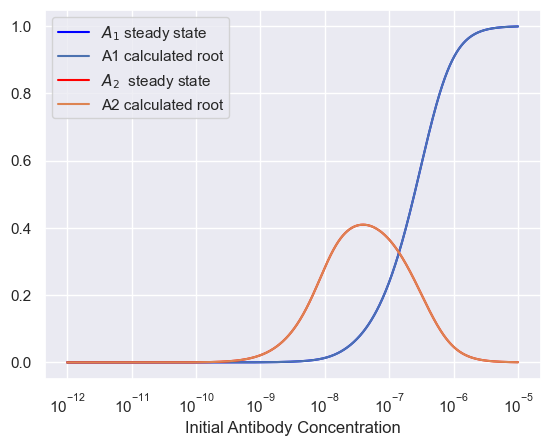

In [56]:
sns.set_theme()
plt.plot(A0s, A1_st_sim/1e7, label = r'$A_1$' + ' steady state', color='blue')
plt.plot(A0s, A1_st_root/1e7, label = 'A1 calculated root')
plt.plot(A0s, A2_st_sim/1e7, label = r'$A_2$ ' + ' steady state', color='red')
plt.plot(A0s, A2_st_root/1e7, label = 'A2 calculated root')

plt.xscale('log')
plt.legend(loc='best')
plt.xlabel('Initial Antibody Concentration')
plt.show()

In [39]:
sns.set_theme()
z = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(1e-5, 1e5, 1e5, 100, 1e-4))
plt.plot(t, z.y[0]/1e5, label=r'$A_1$', c='blue')
plt.plot(t, z.y[1]/1e5, label = r'$A_2$', c='red')
plt.legend(loc='best')
plt.xlabel('log(t)')
plt.xscale('log')
plt.show()

In [40]:

t1 = 0

kon = 1e5
rtot = 1e5
x1 = np.linspace(0, rtot, 500)
x2 = np.linspace(0, rtot/2, 500)
k2 = 1e2
koff = 1e-4
Ainit = 1e-8
Atot = well_size*N_A*Ainit/Target_cell_number
"""
r_ab = 1.25e-8 # in cm
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)
target_effective_conc =(rtot)*(tumour_cell_surface_area)*(1/N_A)/(reaction_volume)
k2 = kon*target_effective_conc/100
print(k2)
"""
z = solve_ivp(model_S_monospecific, tspan, z0, method='Radau', t_eval=t, args=(Ainit, rtot, kon, k2, koff))
limit = min(Atot+100, rtot + 100)
y1 = np.linspace(0, limit, 20)
y2 = np.linspace(0, limit, 20)

Y1, Y2 = np.meshgrid(y1, y2)

A1, A2 = np.zeros(Y1.shape), np.zeros(Y2.shape)

Ni, Nj = Y1.shape

for i in range(Ni):
    for j in range(Nj):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model_S_monospecific(t1, [x, y], Ainit, rtot, kon, k2, koff)
        A1[i, j] = yprime[0]
        A2[i, j] = yprime[1]


#plt.plot(x1, A1_steady_state(x1, Ainit, kon, koff, k2, rtot), label = 'A1 nullcline')
plt.plot(x1, A2_steady_state(x1, k2, koff, rtot), label = 'A2 null 1')
plt.plot(A1_nullcline_plus(x2, rtot, koff, k2), x2, label = 'A1 null 1')
plt.plot(A1_nullcline_minus(x2, rtot, koff, k2), x2,  label = 'A1 null 2')
#plt.plot(x1, Atot - x1, '--', label = 'A1+A2 = Atot',)
#plt.plot(x1, (rtot - x1)/2, '--', label = 'A1 + 2A2 = rtot')
plt.plot(A1_alternative_null_plus(x2, Ainit, rtot, kon, koff, k2), x2, label='A1 null 3')
plt.plot(A1_alternative_null_minus(x2, Ainit, rtot, kon, koff, k2), x2, label='A1 null 4')
plt.plot(x1, A2_alternative_null_minus(x1, Ainit, rtot, kon, koff, k2), label='A2 null 2')
plt.plot(x1, A2_alternative_null_plus(x1, Ainit, rtot, kon, koff, k2), label='A2 null 3')
Q = plt.quiver(Y1, Y2, A1, A2, color='r')
z1 = z.y[0]
z2 = z.y[1]
plt.plot(z1, z2, '--')
plt.plot([z1[0]], [z2[0]], 'o')
plt.plot([z1[-1]], [z2[-1]], 'o')

f = A2_steady_state(x1, k2, koff, rtot)
g = A1_alternative_null_minus(x2, Ainit, rtot, kon, koff, k2)
idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

#plt.plot(x1[idx], A2_steady_state(x1[idx], k2, koff, rtot), 'ro')
print(idx)


plt.legend()


plt.xlim(-10000, limit+1000)
plt.ylim(-10000, limit+1000)
plt.xlabel(r'$A_1$')
plt.title(r'$A_{init}=10^{-5}$ M')
plt.ylabel(r'$A_2$')
plt.show()


[  0 497 498]


/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2353479019.py:16: RuntimeWarning: invalid value encountered in sqrt
  express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2353479019.py:24: RuntimeWarning: invalid value encountered in sqrt
  express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2353479019.py:33: RuntimeWarning: invalid value encountered in sqrt
  express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2353479019.py:42: RuntimeWarning: invalid value encountered in sqrt
  express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/4279814433.py:68: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-10000, limit+1000)


In [41]:
x = Symbol('x')
kon = 1e5
rtot = 1e5
k2 = 1e2
koff = 1e-4
Ainit = 1e-5
Atot = well_size*N_A*Ainit/Target_cell_number
expres = (-2*Atot*kon*Ainit*(rtot - x)*(koff*rtot + k2*x) + x*(((koff*rtot + k2*x)**2) +kon*Ainit*(rtot - x)*(2*koff*rtot + k2*(rtot+x))))/((koff*rtot + k2*x)**2)

print(solveset(expres, x))

{-91344446.6089672, -0.100001107039407, 99889.5392713666}


In [43]:
def jacobian(x, y, alpha1, alpha2, beta):

    return np.array([2*alpha1*(-1-beta + 2*x +3*y) -1 -alpha2*(1 - 2*x - 2*y), 2*alpha1*(-1+3*x -2*beta +4*y) +2*alpha2*y +2],
                    [alpha2*(1 - 2*x - 2*y), -2*alpha2*y -2])

In [44]:
sns.set_theme(style = "white")
sns.set_context("talk")

kon = 1e5
rtot = 1e5
x1 = np.linspace(0, 1, 50000)
x2 = np.linspace(0, 1/2, 500)
k2 = 1
koff = 1e-4
Ainit = 1e-6
Atot = well_size*N_A*Ainit/Target_cell_number
t_end = 60*60*10*10000
t = np.geomspace(1e-10, t_end, 150)
tspan = [1e-10, t_end]

alpha1 = kon*Ainit/koff
print(alpha1)
alpha2 = 100
beta = Atot/rtot
print(beta)
alpha1 = 100
alpha2 = 10
beta = 100

t1 = 0


"""
r_ab = 1.25e-8 # in cm
reaction_volume = (2/3)*math.pi*((r_ab)**3)
tumour_cell_radius = 8e-6
tumour_cell_surface_area = 4*math.pi*((tumour_cell_radius)**2)
target_effective_conc =(rtot)*(tumour_cell_surface_area)*(1/N_A)/(reaction_volume)
k2 = kon*target_effective_conc/100
print(k2)
"""

z = solve_ivp(model_S_dimensionless, tspan, z0, method='Radau', t_eval=t, args=(alpha1, alpha2, beta))
y1 = np.linspace(0, 1, 20)
y2 = np.linspace(0, 0.5, 20)

Y1, Y2 = np.meshgrid(y1, y2)

A1, A2 = np.zeros(Y1.shape), np.zeros(Y2.shape)

Ni, Nj = Y1.shape

for i in range(Ni):
    for j in range(Nj):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = model_S_dimensionless(t1, [x, y], alpha1, alpha2, beta)
        A1[i, j] = yprime[0]
        A2[i, j] = yprime[1]


#plt.plot(x1, A2_steady_state(x1, alpha2), c='red', label='A2 nullcline')#, label = 'null 1')
#plt.plot(A1_nullcline_plus(x2, alpha2), x2, c='grey')#, label = 'null 1')
#plt.plot(A1_nullcline_minus(x2, alpha2), x2, c='grey')#,  label = 'null 2')
#plt.plot(A1_alternative_null_plus(x2, alpha1, alpha2, beta), x2, c='grey')# label='null 3')
#plt.plot(A1_alternative_null_minus(x2, alpha1, alpha2, beta), x2, c='grey')# label='null 4')
plt.plot(x1, A2_alternative_null_minus(x1, alpha1, alpha2, beta), c='blue', label='A1 nullcline')
plt.plot(x1, A2_alternative_null_plus(x1, alpha1, alpha2, beta), c= 'green')#, label='null 3')
#Q = plt.quiver(Y1, Y2, A1, A2, color='red')
z1 = z.y[0]
z2 = z.y[1]
print(z1[-1], z2[-1])
plt.plot(z1, z2, '--', label='trajectory', c='orange')
plt.plot([z1[0]], [z2[0]], 'o', c = 'purple',label='initial condition')
plt.plot([z1[-1]], [z2[-1]], 'o', c='green', label='equilibrium')

f = A2_steady_state(x1, alpha2)
g = A2_alternative_null_minus(x2, alpha1, alpha2, beta)


#idx = np.argwhere(np.diff(np.sign(f - g))).flatten()

#plt.plot(x1[idx], A2_steady_state(x1[idx], alpha2), 'ro')

#plt.legend(loc='best')


#plt.xlim(0.17, 0.2)
#plt.ylim(0.35, 0.57)
plt.xlabel(r'$A_1$')
plt.title(r'$\alpha_1 = \beta = 10$' + r', $\alpha_2=1000$')
plt.ylabel(r'$A_2$')
#sns.despine()
plt.show()


999.9999999999999
4516.60557
0.9994450345855449 0.0002522442734269521


In [45]:
A2s = np.linspace(-0.01, 0.5, 10000000)
A1s = np.linspace(-0.01, 1, 10000000)
alpha1 = 1e3
alpha2 = 1000000000
beta = 1e4

f1 = A1_nullcline_plus(A2s, alpha2)
g1 = A1_alternative_null_minus(A2s, alpha1, alpha2, beta)


idx = np.argwhere(np.diff(np.sign(f1 - g1))).flatten()
x = A1_nullcline_plus(A2s[idx],alpha2)
y = A2s[idx]

print(x[0], y[0])
print(dxdt(x, y, alpha1, alpha2, beta), dydt(x, y, alpha2))

plt.plot(A1_nullcline_plus(A2s[idx[0]],alpha2), A2s[idx[0]], 'ro')

plt.plot(A1_nullcline_plus(A2s, alpha2), A2s)
plt.plot(A1_nullcline_minus(A2s, alpha2), A2s)
plt.plot(A1_alternative_null_minus(A2s, alpha1, alpha2, beta), A2s)
plt.plot(A1_alternative_null_plus(A2s, alpha1, alpha2, beta), A2s)
plt.show()

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2772102448.py:10: RuntimeWarning: invalid value encountered in sqrt
  express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2772102448.py:34: RuntimeWarning: invalid value encountered in sqrt
  express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)


0.020082937214787804 0.4899585069958507
[0.95573751 0.95574267 0.95574783 ...        nan        nan        nan] [-3.60314445e-10 -1.85408022e-10 -6.20952179e-11 ...             nan
             nan             nan]


/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2772102448.py:18: RuntimeWarning: invalid value encountered in sqrt
  express = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)
/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/2772102448.py:26: RuntimeWarning: invalid value encountered in sqrt
  express = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)


In [ ]:
A1s = np.linspace(0, 1, 10000)
alpha1 = 10
alpha2 = 1000
beta = 10
f1= A2_steady_state(A1s, alpha2)
g1 = A2_alternative_null_plus(A1s, alpha1, alpha2, beta)
idx = np.argwhere(np.diff(np.sign(f1 - g1))).flatten()
x = A1s[idx]
y = A2_steady_state(A1s[idx], alpha2)
a = (4*alpha1)
b = (2*alpha1)*(3*A1s - 2*beta - 1)  + (2*alpha2)*A1s + 2
c = (2*alpha1)*(beta - A1s*(beta - A1s)) - A1s - (alpha2)*(A1s - A1s**2)

#print(x, y)
#print(dxdt(x, y, alpha1, alpha2, beta), dydt(x, y, alpha2))
#plt.plot(A1s[idx], A2_steady_state(A1s[idx], alpha2), 'ro')
#plt.plot(A1s, A2_steady_state(A1s, alpha2))
#plt.plot(A1s, A2_alternative_null_minus(A1s, alpha1, alpha2, beta))
#plt.plot(A1s, A2_alternative_null_plus(A1s, alpha1, alpha2, beta))
#plt.plot(A1s, (-b)**(2))
plt.plot(A1s, b**2 - 4*a*c)
#plt.plot(A1s, 4*a*c)
#plt.plot(A2s, alpha2*A2s*(1-A2s))
#plt.ylim(0, 0.5)
print(c[-1])
plt.show()

/opt/homebrew/lib/python3.10/site-packages/ipykernel/eventloops.py:107: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  app.exec_()


: 

: 

In [ ]:
A0s = np.geomspace(1e-12, 1e-5, 50)
alpha1s = np.geomspace(1e-3, 1e5, len(A0s))
alpha2s = np.geomspace(1, 1e6, len(A0s))
rtot = 1e5
kon = 1e5

koff=1e-4

Y = np.zeros((len(A0s), len(alpha1s), len(alpha2s)))

for i, Ainit in enumerate(A0s):
    print(i)
    for k, alpha1 in enumerate(alpha1s):
        for j, alpha2 in enumerate(alpha2s):
            Atot = well_size*N_A*Ainit/Target_cell_number
            beta = Atot/rtot
            z = solve_ivp(model_S_dimensionless, t_span=tspan, y0=[0,0], method='Radau', t_eval=t, args=(alpha1, alpha2, beta))
            A1 = z.y[0]
            A2 = z.y[1]
            Y[j, k, i] = A1[-1]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


<AxesSubplot:>

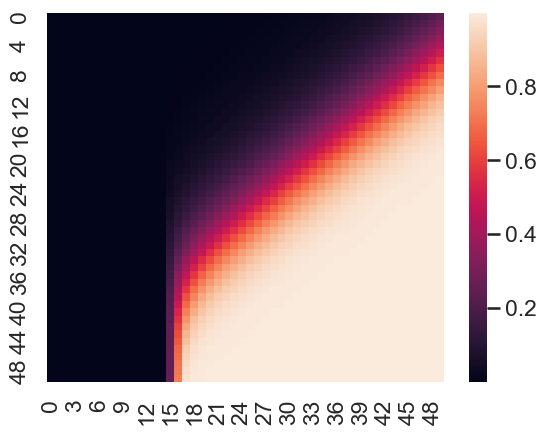

In [ ]:
sns.heatmap(Y[25][:][:])

In [ ]:
from  matplotlib.widgets import Slider, Button
import PyQt5

#%matplotlib qt

def f(value):
    
    for i, val in enumerate(alpha1s):
        if val == value:
            arg = i
    array = Y[arg][:][:]
    return array


fig, ax = plt.subplots(figsize=(8, 6))
line = sns.heatmap(f(alpha1s[0]), xticklabels=True, yticklabels=True, ax=ax) 
fig.subplots_adjust(left=0.25, bottom = 0.25)
#ax = sns.heatmap(Y[0,:,:], xticklabels=True, yticklabels=True, ax=ax)
ax.set_xticks([0, 7, 15, 21, 29, 35, 42, 49])
ax.set_yticks([0, 8, 16, 25, 33, 41, 49])
ax.set_yticklabels([1, 10, r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$', r'$10^6$'])
ax.set_xticklabels([r'$10^{-12}$', r'$10^{-11}$', r'$10^{-10}$', r'$10^{-9}$', r'$10^{-8}$', r'$10^{-7}$', r'$10^{-6}$', r'$10^{-5}$'])
ax.set_xlabel(r'$A_{init}$' + ' (M)')
ax.set_ylabel(r'$\alpha_2$')
ax.set_title(r'$A_1$' + ' steady state heatmap')

axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
a1_slider = Slider(
    ax=axfreq,
    label=r'$\alpha_1$',
    valmin=alpha1s[0],
    valmax= alpha1s[-1],
    valinit = alpha1s[49]
)

def update(val):
    line.set_data(f(a1_slider.val))
    fig.canvas.draw_idle()

a1_slider.on_changed(update)

plt.show()

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

x = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, x)
Z = np.sin(X)*np.sin(Y)

levels = np.linspace(-1, 1, 40)

ax.contourf(alpha1s, A0s, .1*np.sin(3*X)*np.sin(5*Y), zdir='z', levels=.1*levels)
ax.contourf(alpha1s, A0s, 3+.1*np.sin(5*X)*np.sin(8*Y), zdir='z', levels=3+.1*levels)
ax.contourf(alpha1s, A0s, 7+.1*np.sin(7*X)*np.sin(3*Y), zdir='z', levels=7+.1*levels)

ax.legend()
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0, 1)
ax.set_zlim3d(0, 10)

plt.show()

/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/3569488006.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


TypeError: Length of x (50) must match number of columns in z (100)

Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/opt/homebrew/lib/python3.10/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/943306124.py", line 37, in update
    line.set_data(f(a1_slider.val))
AttributeError: 'AxesSubplot' object has no attribute 'set_data'
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.10/site-packages/matplotlib/cbook/__init__.py", line 287, in process
    func(*args, **kwargs)
  File "/opt/homebrew/lib/python3.10/site-packages/matplotlib/widgets.py", line 585, in <lambda>
    return self._observers.connect('changed', lambda val: func(val))
  File "/var/folders/qf/lh9kspxj3zx7v12f8f3xdfbw0000gn/T/ipykernel_8647/943306124.py", line 37, in update
    line.set_data(f(a1_slid

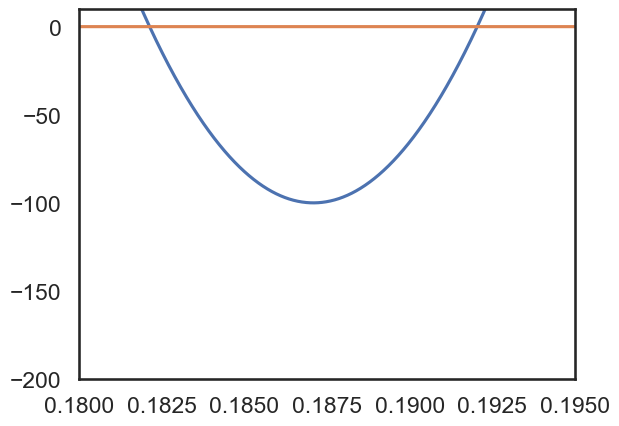

In [ ]:
def nullcline_polly(A1, A2, alpha1, alpha2, beta):
    a = (4*alpha1)
    b = (2*alpha1)*(3*A1 - 2*beta - 1)  + (2*alpha2)*A1 + 2
    c = (2*alpha1)*(beta - A1 -A1*beta +(A1**2)) - A1 - (alpha2)*(A1 - A1**2)
    f1 = 4*alpha1
    f2 = 2*alpha1*(3*A1 - 2*beta - 1) + 2*alpha2*A1 + 2
    f3 = 2*alpha1*(beta - A1*(1 + beta - A1)) - A1 - alpha2*A1*(1-A1)

    return a*(A2**2) + b*A2 + c

def discriminant(A1, alpha1, alpha2, beta):
    a = (4*alpha1)
    b = (2*alpha1)*(3*A1 - 2*beta - 1)  + (2*alpha2)*A1 + 2
    c = (2*alpha1)*(beta - A1 -A1*beta +(A1**2)) - A1 - (alpha2)*(A1 - A1**2)

    return b**2 -4 *a*c

A2s = np.linspace(0, 1, 100000)
plt.xlim(0.18, 0.195)
plt.ylim(-200, 10)
#plt.plot(A2s, nullcline_polly(0.185, A2s, 10, 1000, 10))
plt.plot(A2s, discriminant(A2s, 10, 1000, 10))
plt.plot(A2s, np.zeros_like(A2s))

In [ ]:
rtots = np.linspace(1e2, 1e7, 105)
A0s1 = [1e-12, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
A0s = []
vals = np.linspace(1, 9, 15)

for x in A0s1:
    for val in vals:
        A0s.append(x*val)
A0s = np.asarray(A0s)
print(len(A0s))

Y = np.zeros((105, 105))

k1 = 1e5
x = Symbol('x')
for i in range(len(rtots)):
    print(i)
    rtot = rtots[i]
    for j in range(len(A0s)):
        Ainit = A0s[j]
        Atot = well_size*N_A*Ainit/Target_cell_number
        express = (-2*Atot*k1*Ainit*(rtot - x)*(koff*rtot + k2*x) + x*(((koff*rtot + k2*x)**2) +k1*Ainit*(rtot - x)*(2*koff*rtot + k2*(rtot+x))))/((koff*rtot + k2*x)**2)
        vals = solveset(express, x)
        counter = 0
        for val in vals:
            if np.iscomplex(val) == False:
                if (val >=0) and (val <= rtot):
                    counter +=1
        Y[i][j] = counter

105
0
1


TypeError: Invalid comparison of non-real -9.66667398686631 - 30.310945273494*I

In [ ]:
for i in range(len(rtots)):
    for j in range(len(A0s)):
        if (Y[i][j] != 3):
            print('here')